In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('The shape of training data is ',train.shape)
print('The shape of testing data is ',test.shape)

The shape of training data is  (1460, 81)
The shape of testing data is  (1459, 80)


In [53]:
# Combined training and testing dataset
combined = pd.concat([train,test])

In [54]:
combined.columns.values

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour',
       'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolAre

To understand the data, we can look at each variable and understand what information it represents and the
characterestics of each information

We will go in the same order as in the file data_description.txt

In [56]:
L = pd.DataFrame([[0,0,0,0,0,0]])
L.columns = ['Variable','Type','Segment','Expectation','Conclusion','Comments']

In [308]:
def Exploration(coloumn):
    print('The number of unique value in the dataset is/are, ',len(combined[coloumn].unique()))
    print('There are', combined[combined[coloumn].isnull()].shape[0], 'missing records')
    print('Total number of records are ', len(combined))
    return

def One_Hot_Encoding(coloumn):
    global combined
    combined = pd.concat([combined,pd.get_dummies(combined[coloumn],prefix = coloumn)],axis=1)
    combined.drop([coloumn],axis=1,inplace=True)
    return

def Label_Encoding(coloumn):
    global combined
    le = LabelEncoder()
    le = le.fit(combined[coloumn])
    combined[coloumn] = le.transform(combined[coloumn])
    return
    
def Replace_Missing_with_Mode(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].mode()[0]
    return

def Replace_Missing_with_Median(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].median()
    return

def Replace_Missing_with_Mean(coloumn):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = combined[coloumn].mean
    return

def Replace_Missing_with_Specific_Number(coloumn,value = 0):
    global combined
    combined[coloumn][combined[coloumn].isnull()] = 0
    return

def Scaling(coloumn):
    global combined
    combined[coloumn] = scale(combined[coloumn])

def Standard_Scaling(coloumn):
    global combined
    scaler = StandardScaler().fit(combined[coloumn])
    scaler = scaler.transform(combined[coloumn])

def Scaling(coloumn):
    global combined

    combined[coloumn] = scaler.trans

# 1: MSSubClass

In [63]:
Exploration('MSSubClass')

The number of unique value in the dataset is/are,  16
There are 0 missing records
Total number of records are  2919


In [64]:
combined['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150])

This means that this is a categorical varibale.
The description file tells us what each variable indicates.

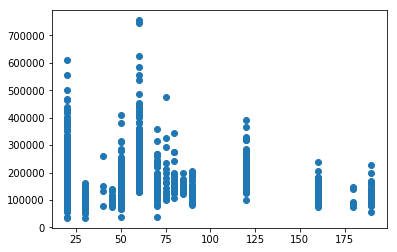

In [65]:
plt.scatter(combined['MSSubClass'],combined['SalePrice'])
plt.show()

There doesn't seem to be any particular ordinal relationship between MSSubClass and Sale Price \n
Hence we classify this as a nominal categorical variable

We perform one-hot encoding on this variable

In [68]:
One_Hot_Encoding('MSSubClass')

# 2: MSZoning

In [69]:
Exploration('MSZoning')

The number of unique value in the dataset is/are,  6
There are 4 missing records
Total number of records are  2919


In [70]:
combined['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

This is clearly categorical varible.<br>
However from the data description we can see that some are ordinal while some are nominal <br>
RH,RM,RL => Ordinal Variable Combination<br>
Others => Nominal Variable Combination<br>

ALSO...<br>
There are missing values!

In [71]:
combined[combined['MSZoning'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
455,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
756,733,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
790,1150,686,0,NaN,4,1Fam,TA,No,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1444,1600,0,0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
combined['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

For now let's just replace with the mode i.e. RL

In [73]:
combined['MSZoning'][combined['MSZoning'].isnull()] = 'RL'

In [74]:
combined['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [75]:
One_Hot_Encoding('MSZoning')

# 3: LotFrontage

In [77]:
Exploration('LotFrontage')

The number of unique value in the dataset is/are,  129
There are 486 missing records
Total number of records are  2919


This is a continious variable.

The skewness of the Lot Frontage is  1.50327781464
The kurtosis of the Lot Frontage is  11.2959206458


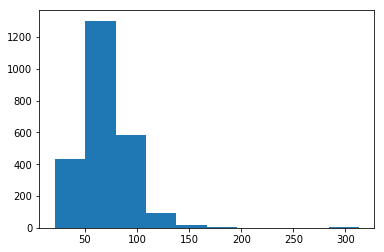

In [78]:
print('The skewness of the Lot Frontage is ', combined.LotFrontage.skew())
print('The kurtosis of the Lot Frontage is ', combined.LotFrontage.kurtosis())
plt.hist(combined[combined['LotFrontage'].notnull()]['LotFrontage'])
plt.show()

We will just normalize the data so that it does not create a bias in the cost function

In [79]:
print('There are', combined[combined['LotFrontage'].isnull()].shape[0], 'missing records')
print('There are total ',combined.shape[0],' records')

There are 486 missing records
There are total  2919  records


This means that almost 25% of the entries are missing. <br>
Here replacing simply by median/mean does not seem like a smart approach. <br>
So we delete this coloumn <br>

In [80]:
#Come back to this later

In [81]:
combined.drop(['LotFrontage'],axis=1,inplace=True)

# 4: LotArea

In [82]:
Exploration('LotArea')

The number of unique value in the dataset is/are,  1951
There are 0 missing records
Total number of records are  2919


No Misssing Values! sweet!

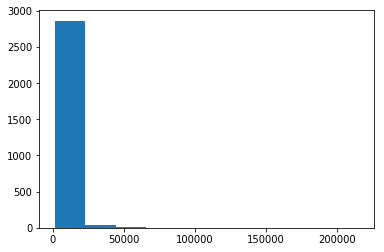

In [83]:
plt.hist(combined['LotArea'])
plt.show()

Wow. This data has some weird outliers for sure. <br>
Let us explore

In [84]:
combined['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

Before we take any steps to remove or rectofy outliers, we should observe the impact on sale price

In [85]:
temp = combined[combined.SalePrice.notnull()][['LotArea','SalePrice']]
print('The length of observation data is ',len(temp))

The length of observation data is  1460


In [86]:
temp.head()

,LotArea,SalePrice
0,8450,208500.0
1,9600,181500.0
2,11250,223500.0
3,9550,140000.0
4,14260,250000.0


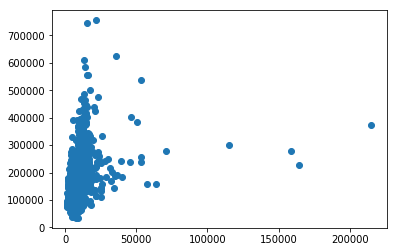

In [87]:
plt.scatter(temp['LotArea'],temp['SalePrice'])
plt.show()

The outliers clearly show out of box pattern. <br>
We instead of deleting the outlier record, put the value at median + 1.97(std) (95th Confidence Interval)

In [88]:
median = temp['LotArea'].median()
std = temp['LotArea'].std()
UE = median + 1.97*std
LE = median - 1.97*std

print('The upper end of the outlier is ',UE)
print('The lower end of the outlier is ',LE)

The upper end of the outlier is  29141.591916786918
The lower end of the outlier is  -10184.591916786918


Obviously, there are no outliers lesser than the lower end <br>
Let us see how many outliers are on the upper end

In [89]:
print('Total number of outliers more than the upper end are ',len(temp[temp['LotArea'] > UE]))

Total number of outliers more than the upper end are  23


In [90]:
combined['LotArea'][combined.LotArea > UE] = UE

# 5: Street

In [92]:
Exploration('Street')

The number of unique value in the dataset is/are,  2
There are 0 missing records
Total number of records are  2919


Niceeee!<br>
From the data description we can see that these are nominal categorical data types <br>
We will perform one-hot encoding on this coloumn

In [93]:
One_Hot_Encoding('Street')

# 6: Alley

In [94]:
Exploration('Alley')

The number of unique value in the dataset is/are,  3
There are 2721 missing records
Total number of records are  2919


There is clearly no choice but to drop this coloumn

In [95]:
combined.drop(['Alley'],axis=1,inplace=True)

# 7: Lot Shape

In [96]:
Exploration('LotShape')

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


No missing values! Sweet!

In [97]:
print(combined['LotShape'].unique())

['Reg' 'IR1' 'IR2' 'IR3']


From the data description we can see that this is a ordinal category variable <br>
Hence we will proceed with two steps:<br>
Step I: Perform Label Encoding<br>
Step II: Normalize the values<br>

In [99]:
Label_Encoding('LotShape')

In [100]:
print('The value counts of the coloumn Lot shape is\n')
print(combined['LotShape'].value_counts())

The value counts of the coloumn Lot shape is

3    1859
0     968
1      76
2      16
Name: LotShape, dtype: int64


# 8: Land Contour

In [101]:
Exploration('LandContour')

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


In [43]:
combined.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [104]:
Label_Encoding('LotShape')

# 9: Utilities

In [105]:
Exploration('Utilities')

The number of unique value in the dataset is/are,  3
There are 2 missing records
Total number of records are  2919


In [106]:
combined[combined['Utilities'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave
455,810,0,0,1,1Fam,NaN,NaN,0.0,0.0,NaN,...,0,0,0,0,0,0,1,0,1,0
485,1474,0,0,3,1Fam,TA,No,0.0,0.0,Unf,...,0,0,0,0,0,0,1,0,0,1


In [108]:
combined.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Wow! I did not see that coming. <br> 
It seems that almost all values point towards AllPub. Hence, we cannot gain any new insights from this coloum.<br>
So let's just drop this coloumn<br>

In [109]:
combined.drop(['Utilities'],axis=1,inplace=True)

# 10: LotConfig

In [113]:
Exploration('LotConfig')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


No missing records! Sweet! 

In [115]:
combined.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

It is a bit debatable that the categorical variable type is ordinal or nominal. <br>
But the data seems to incline towards nominal side. <br>
Hence, we will take it as nominal type <br>

In [116]:
One_Hot_Encoding('LotConfig')

# 10: LandSlope

In [118]:
Exploration('LandSlope')

The number of unique value in the dataset is/are,  3
There are 0 missing records
Total number of records are  2919


In [119]:
combined.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

On going through the data description, we identify that it is a ordinal categorical variable. <br>
We will plot a scatter plot between LandSlope and SalePrice to verfify our claim <br>

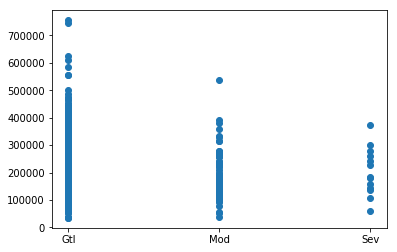

In [123]:
plt.scatter(combined.LandSlope,combined.SalePrice)
plt.show()

This shows a relationship that a typcial ordinal variable is expected to show

# 11: Neighborhood

In [125]:
Exploration('Neighborhood')

The number of unique value in the dataset is/are,  25
There are 0 missing records
Total number of records are  2919


No missing values, Sweet! :D

In [127]:
combined.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [128]:
One_Hot_Encoding('Neighborhood')

# 12: Condition1

In [130]:
Exploration('Condition1')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [131]:
combined.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

This is a nominal variable

In [133]:
One_Hot_Encoding('Condition1')

# 13: Condition2

In [135]:
Exploration('Condition2')

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [136]:
combined.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], dtype=object)

In [137]:
One_Hot_Encoding('Condition2')

# 14: BldfType

In [141]:
Exploration('BldgType')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [143]:
combined.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [145]:
One_Hot_Encoding('BldgType')

# 15: HouseStyle

In [146]:
Exploration('HouseStyle')

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [147]:
combined.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [149]:
Label_Encoding('HouseStyle')

# 16: OverallQual

In [151]:
Exploration('OverallQual')

The number of unique value in the dataset is/are,  10
There are 0 missing records
Total number of records are  2919


In [153]:
combined.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [155]:
combined.OverallQual.value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

This is a correctly labelled encoder. We do not need to perform any transformations

# 17 OverallCond

In [157]:
Exploration('OverallCond')

The number of unique value in the dataset is/are,  9
There are 0 missing records
Total number of records are  2919


In [160]:
combined.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [161]:
combined.OverallCond.value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

# 18 YearBuilt

In [163]:
Exploration('YearBuilt')

The number of unique value in the dataset is/are,  118
There are 0 missing records
Total number of records are  2919


In [164]:
combined.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901])

In [166]:
combined.YearBuilt.value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
2008     49
1958     48
2000     48
2002     47
1998     46
1968     45
1959     43
1954     43
1910     43
1970     42
1967     41
1972     40
1956     39
1971     39
1978     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
       ... 
1982      7
1931      7
1985      7
1942      6
1912      5
1919      5
1932      5
1880      5
1934      5
2010      3
1905      3
1895      3
1917      3
1908      2
1885      2
1901      2
1892      2
1882      1
1896      1
1898      1
1902      1
1907      1
1904      1
1906      1
1913      1
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

We leave it like that only

# 19 YearRemodAdd

In [167]:
Exploration('YearRemodAdd')

The number of unique value in the dataset is/are,  61
There are 0 missing records
Total number of records are  2919


In [169]:
combined.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

In [170]:
combined.YearRemodAdd.value_counts()

1950    361
2006    202
2007    164
2005    141
2004    111
2000    104
2003     99
2002     82
2008     81
1998     77
1999     60
1996     59
1995     56
1994     53
1997     49
2001     49
1976     48
1977     46
1970     44
1993     43
1968     39
1978     36
1972     35
1958     34
2009     34
1967     34
1992     32
1971     31
1959     30
1963     30
       ... 
1956     30
1990     29
1960     29
1991     29
1954     28
1965     28
1966     27
1962     26
1980     26
1964     26
1969     26
1955     25
1979     24
1961     24
1973     21
1957     20
1953     20
1984     19
1974     19
1989     18
1987     16
1988     15
1952     15
1985     14
1951     14
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

# 20 RoofStyle

In [171]:
Exploration('RoofStyle')

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [172]:
combined.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [174]:
Label_Encoding('RoofStyle')

# 21 RoofMatl

In [175]:
Exploration('RoofMatl')

The number of unique value in the dataset is/are,  8
There are 0 missing records
Total number of records are  2919


In [176]:
combined.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [177]:
One_Hot_Encoding('RoofMatl')

# 22 Exterior1st

In [179]:
Exploration('Exterior1st')

The number of unique value in the dataset is/are,  16
There are 1 missing records
Total number of records are  2919


In [183]:
combined.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

We will replace with the mode itself

In [184]:
combined['Exterior1st'][combined['Exterior1st'].isnull()] = combined.Exterior1st.value_counts()[0]

In [185]:
Exploration('Exterior2nd')

The number of unique value in the dataset is/are,  17
There are 1 missing records
Total number of records are  2919


In [187]:
combined.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [188]:
combined['Exterior2nd'][combined['Exterior2nd'].isnull()] = combined.Exterior2nd.value_counts()[0]

# 23 MasVnrType

In [190]:
Exploration('MasVnrType')

The number of unique value in the dataset is/are,  5
There are 24 missing records
Total number of records are  2919


In [193]:
combined.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [195]:
combined['MasVnrType'][combined['MasVnrType'].isnull()] ='None'

In [196]:
combined.MasVnrType.value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

# 24: MasVnrArea

In [198]:
Exploration('MasVnrArea')

The number of unique value in the dataset is/are,  445
There are 23 missing records
Total number of records are  2919


In [199]:
combined.MasVnrArea.value_counts()

0.0       1738
120.0       15
176.0       13
200.0       13
216.0       12
180.0       12
144.0       11
72.0        11
108.0       11
16.0        11
340.0       10
80.0         9
210.0        9
128.0        9
196.0        9
256.0        8
178.0        8
40.0         8
302.0        8
170.0        8
132.0        8
260.0        7
300.0        7
203.0        7
186.0        7
456.0        7
420.0        7
50.0         7
252.0        7
106.0        7
          ... 
81.0         1
528.0        1
91.0         1
87.0         1
97.0         1
63.0         1
408.0        1
47.0         1
39.0         1
118.0        1
1170.0       1
376.0        1
584.0        1
322.0        1
634.0        1
532.0        1
1290.0       1
519.0        1
287.0        1
571.0        1
435.0        1
886.0        1
237.0        1
738.0        1
1050.0       1
664.0        1
247.0        1
550.0        1
137.0        1
572.0        1
Name: MasVnrArea, Length: 444, dtype: int64

In [200]:
combined['MasVnrArea'][combined['MasVnrArea'].isnull()] =combined.MasVnrArea.value_counts()[0]

# 25: ExterQual

In [202]:
Exploration('ExterQual')

The number of unique value in the dataset is/are,  4
There are 0 missing records
Total number of records are  2919


In [203]:
combined.ExterQual.value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [204]:
Label_Encoding('ExterQual')

# 26: ExterCond

In [205]:
Exploration('ExterCond')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [206]:
combined.ExterCond.value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [207]:
Label_Encoding('ExterCond')

# 27: Foundation

In [209]:
Exploration('Foundation')

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [210]:
combined.Foundation.value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [211]:
Label_Encoding('Foundation')

# 28: BsmtQual

In [213]:
Exploration('BsmtQual')

The number of unique value in the dataset is/are,  5
There are 81 missing records
Total number of records are  2919


In [214]:
combined.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [217]:
combined['BsmtQual'][combined['BsmtQual'].isnull()] = 'None'

In [218]:
combined.BsmtQual.value_counts()

TA      1283
Gd      1209
Ex       258
Fa        88
None      81
Name: BsmtQual, dtype: int64

# 29: BsmtCond

In [220]:
Exploration('BsmtCond')

The number of unique value in the dataset is/are,  5
There are 82 missing records
Total number of records are  2919


In [222]:
combined.BsmtCond.value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [223]:
combined['BsmtCond'][combined['BsmtCond'].isnull()] = 'None'

In [224]:
combined.BsmtQual.value_counts()

TA      1283
Gd      1209
Ex       258
Fa        88
None      81
Name: BsmtQual, dtype: int64

# 30: BsmtExposure

In [225]:
Exploration('BsmtExposure')

The number of unique value in the dataset is/are,  5
There are 82 missing records
Total number of records are  2919


In [226]:
combined.BsmtExposure.value_counts()

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [228]:
combined['BsmtExposure'][combined['BsmtExposure'].isnull()] = 'NA'

# 31: BsmtFinType1

In [229]:
Exploration('BsmtFinType1')

The number of unique value in the dataset is/are,  7
There are 79 missing records
Total number of records are  2919


In [231]:
combined.BsmtFinType1.value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [232]:
combined['BsmtFinType1'][combined['BsmtFinType1'].isnull()] = 'NA'

In [234]:
Label_Encoding('BsmtFinType1')

# 32: BsmtFinSF1

In [236]:
Exploration('BsmtFinSF1')

The number of unique value in the dataset is/are,  992
There are 1 missing records
Total number of records are  2919


In [237]:
combined.BsmtFinSF1.value_counts()

0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
384.0       8
600.0       8
20.0        8
602.0       7
500.0       7
700.0       7
360.0       7
456.0       7
936.0       7
375.0       7
624.0       7
560.0       6
312.0       6
528.0       6
504.0       6
662.0       6
547.0       6
468.0       6
368.0       6
544.0       6
553.0       6
120.0       6
276.0       6
625.0       6
588.0       6
         ... 
1285.0      1
1150.0      1
806.0       1
349.0       1
1682.0      1
702.0       1
393.0       1
587.0       1
427.0       1
586.0       1
1836.0      1
501.0       1
954.0       1
710.0       1
722.0       1
491.0       1
1812.0      1
1261.0      1
1375.0      1
1172.0      1
987.0       1
759.0       1
1178.0      1
1158.0      1
1122.0      1
1022.0      1
939.0       1
1124.0      1
1619.0      1
1106.0      1
Name: BsmtFinSF1, Length: 991, dtype: int64

In [238]:
combined['BsmtFinSF1'][combined['BsmtFinSF1'].isnull()] = 0

# 33:BsmtFinType2

In [240]:
Exploration('BsmtFinSF1')

The number of unique value in the dataset is/are,  991
There are 0 missing records
Total number of records are  2919


# 34: BsmtUnfSF

In [242]:
Exploration('BsmtUnfSF')

The number of unique value in the dataset is/are,  1136
There are 1 missing records
Total number of records are  2919


In [243]:
combined.BsmtUnfSF.value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
572.0      11
216.0      11
100.0      11
816.0      11
624.0      10
270.0      10
300.0      10
264.0       9
396.0       9
280.0       9
186.0       9
768.0       9
780.0       8
546.0       8
348.0       8
294.0       8
440.0       8
162.0       8
480.0       8
832.0       8
108.0       8
840.0       8
784.0       7
80.0        7
392.0       7
         ... 
127.0       1
795.0       1
214.0       1
1098.0      1
584.0       1
532.0       1
983.0       1
79.0        1
388.0       1
559.0       1
1616.0      1
889.0       1
1078.0      1
1411.0      1
999.0       1
659.0       1
709.0       1
1214.0      1
657.0       1
587.0       1
1146.0      1
2140.0      1
579.0       1
735.0       1
1073.0      1
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [244]:
combined['BsmtUnfSF'][combined['BsmtUnfSF'].isnull()] = 0

# 35:TotalBsmtSF

In [246]:
Exploration('TotalBsmtSF')

The number of unique value in the dataset is/are,  1059
There are 1 missing records
Total number of records are  2919


In [247]:
combined.TotalBsmtSF.value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
768.0     24
816.0     23
728.0     20
1008.0    19
780.0     19
384.0     19
960.0     18
894.0     17
756.0     17
832.0     17
546.0     16
936.0     16
720.0     16
600.0     16
848.0     16
483.0     14
630.0     13
952.0     13
840.0     13
988.0     12
624.0     12
876.0     11
784.0     11
796.0     11
1056.0    10
          ..
1967.0     1
1905.0     1
1679.0     1
1533.0     1
2140.0     1
1994.0     1
1378.0     1
763.0      1
1047.0     1
1376.0     1
904.0      1
370.0      1
1570.0     1
2033.0     1
1709.0     1
1519.0     1
2077.0     1
1550.0     1
797.0      1
699.0      1
559.0      1
396.0      1
1866.0     1
1641.0     1
961.0      1
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [248]:
combined.BsmtUnfSF.median()

467.0

In [253]:
combined.TotalBsmtSF.describe()

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

The skewness of the data is  1.1628824746
The skewness of the data is  9.15109919137


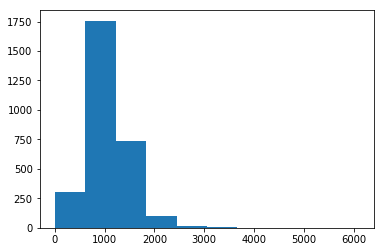

In [260]:
print('The skewness of the data is ',combined['TotalBsmtSF'].skew())
print('The skewness of the data is ',combined['TotalBsmtSF'].kurtosis())

plt.hist(combined['TotalBsmtSF'][combined['TotalBsmtSF'].notnull()])
plt.show()

In [262]:
combined['TotalBsmtSF'][combined['TotalBsmtSF'].isnull()] = combined.BsmtUnfSF.median()

# 36: Heating

In [264]:
Exploration('Heating')

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [284]:
combined.Heating.unique()

array([1, 2, 3, 5, 4, 0])

In [266]:
Label_Encoding('Heating')

# 37: HeatingQC

In [268]:
Exploration('HeatingQC')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [270]:
combined.HeatingQC.value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [271]:
Label_Encoding('HeatingQC')

# 38: CentralAir

In [273]:
Exploration('CentralAir')

The number of unique value in the dataset is/are,  2
There are 0 missing records
Total number of records are  2919


In [275]:
combined.CentralAir.value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [276]:
Label_Encoding('CentralAir')

# 39: Electrical

In [278]:
Exploration('Electrical')

The number of unique value in the dataset is/are,  6
There are 1 missing records
Total number of records are  2919


In [288]:
combined.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
2671        1
Name: Electrical, dtype: int64

In [289]:
combined['Electrical'][combined['Electrical'].isnull()]# = combined.Electrical.value_counts()[0]

Series([], Name: Electrical, dtype: object)

In [287]:
Label_Encoding('Electrical')

TypeError: '>' not supported between instances of 'str' and 'int'

# 81 Sale Price

In [11]:
combined.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The skewness of the Sale Price is  1.88287575977
The kurtosis of the Sale Price is  6.53628186006


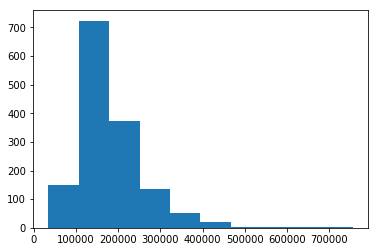

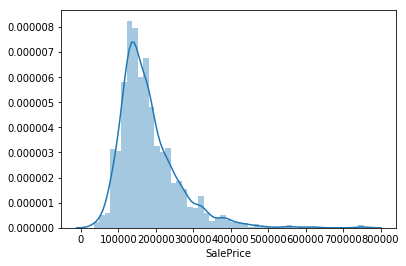

In [78]:
print('The skewness of the Sale Price is ', combined.SalePrice.skew())
print('The kurtosis of the Sale Price is ', combined.SalePrice.kurtosis())
plt.hist(combined[combined['SalePrice'].notnull()]['SalePrice'])
plt.show()
sns.distplot(combined[combined['SalePrice'].notnull()]['SalePrice'])
plt.show()

Trying to Apply Central Limit Theorem

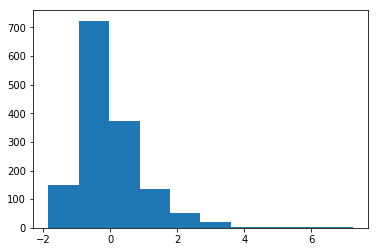

In [73]:
mean = combined['SalePrice'].mean()
std = combined['SalePrice'].std()
combined['target'] = (combined['SalePrice'] - mean) / std
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
combined['target'] = (combined['target'] - combined['target'].mean()) / combined['target'].std()
plt.hist(combined[combined['target'].notnull()]['target'])
plt.show()

We failed miserably! :(

# PavedDrive

In [311]:
Exploration('PavedDrive')

The number of unique value in the dataset is/are,  3
There are 0 missing records
Total number of records are  2919


In [314]:
combined.PavedDrive.value_counts()

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

This is ordinal type categorical variable

In [316]:
combined.PavedDrive[combined.PavedDrive == 'Y'] = 1
combined.PavedDrive[combined.PavedDrive == 'P'] = 2
combined.PavedDrive[combined.PavedDrive == 'N'] = 3


# WoodDeckSF

In [321]:
Exploration('WoodDeckSF')

The number of unique value in the dataset is/are,  379
There are 0 missing records
Total number of records are  2919


# OpenPorchSF

In [325]:
Exploration('OpenPorchSF')

The number of unique value in the dataset is/are,  252
There are 0 missing records
Total number of records are  2919


# EnclosedPorch

In [327]:
Exploration('EnclosedPorch')

The number of unique value in the dataset is/are,  183
There are 0 missing records
Total number of records are  2919


# 3SsnPorch

In [330]:
Exploration('3SsnPorch')

The number of unique value in the dataset is/are,  31
There are 0 missing records
Total number of records are  2919


In [334]:
combined['3SsnPorch'].value_counts()

0      2882
153       3
168       3
144       2
180       2
216       2
219       1
176       1
86        1
96        1
120       1
130       1
140       1
255       1
150       1
162       1
245       1
174       1
225       1
23        1
182       1
196       1
323       1
224       1
238       1
290       1
304       1
320       1
360       1
508       1
407       1
Name: 3SsnPorch, dtype: int64

In [335]:
combined['3SsnPorch'][combined['3SsnPorch'] != 0] = 1

# ScreenPorch

In [336]:
Exploration('ScreenPorch')

The number of unique value in the dataset is/are,  121
There are 0 missing records
Total number of records are  2919


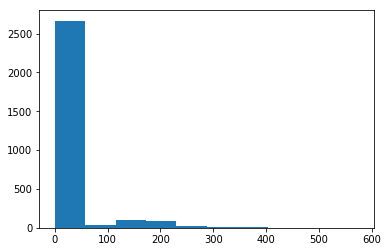

In [340]:
plt.hist(combined['ScreenPorch'])
plt.show()

In [338]:
combined['ScreenPorch'].value_counts()

0      2663
144      13
192      11
168      10
120       9
216       8
180       7
200       7
160       6
224       6
100       5
288       4
225       4
156       4
126       4
189       4
153       4
155       4
182       3
161       3
256       3
142       3
147       3
115       3
112       3
195       3
90        3
210       3
175       3
145       2
       ... 
263       1
265       1
271       1
273       1
287       1
113       1
111       1
109       1
342       1
228       1
234       1
252       1
260       1
291       1
270       1
276       1
280       1
312       1
348       1
99        1
374       1
396       1
410       1
440       1
480       1
490       1
576       1
53        1
63        1
264       1
Name: ScreenPorch, Length: 121, dtype: int64

In [350]:
combined['ScreenPorch'][combined['ScreenPorch'] > 0] = 1

# PoolArea

In [356]:
Exploration('PoolArea')

The number of unique value in the dataset is/are,  14
There are 0 missing records
Total number of records are  2919


In [357]:
combined.PoolArea.value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [359]:
combined['PoolArea'][combined['PoolArea'] > 0] = 1

# PoolQC

In [361]:
Exploration('PoolQC')

The number of unique value in the dataset is/are,  4
There are 2909 missing records
Total number of records are  2919


In [362]:
combined['PoolQC'][combined['PoolQC'].isnull()] = 0

In [365]:
combined.PoolQC.value_counts()

0     2909
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64

In [366]:
combined['PoolQC'][combined['PoolQC'] == 'Fa'] = 1
combined['PoolQC'][combined['PoolQC'] == 'Gd'] = 2
combined['PoolQC'][combined['PoolQC'] == 'Ex'] = 3

# Fence

In [367]:
Exploration('Fence')

The number of unique value in the dataset is/are,  5
There are 2348 missing records
Total number of records are  2919


In [369]:
combined['Fence'][combined['Fence'].isnull()] = 0

In [370]:
combined.Fence.value_counts()

0        2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [372]:
combined['Fence'][combined['Fence'] == 'MnWw'] = 1
combined['Fence'][combined['Fence'] == 'GdWo'] = 2
combined['Fence'][combined['Fence'] == 'MnPrv'] = 3
combined['Fence'][combined['Fence'] == 'GdPrv'] = 4

# MiscFeature

In [373]:
Exploration('MiscFeature')

The number of unique value in the dataset is/are,  5
There are 2814 missing records
Total number of records are  2919


In [374]:
combined['MiscFeature'][combined['MiscFeature'].isnull()] ='None'

In [382]:
combined['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [383]:
One_Hot_Encoding('MiscFeature')

# MiscVal

In [385]:
Exploration('MiscVal')

The number of unique value in the dataset is/are,  38
There are 0 missing records
Total number of records are  2919


In [386]:
combined['MiscVal'].value_counts()

0        2816
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: MiscVal, dtype: int64

In [387]:
#Make a new feature out of Misc Feature and MiscVal
#One Feature that encompassess both the combinations
# Might become a categorical variable with very high number of categories
# Research on what to do in these circumstances

# MoSold

In [390]:
Exploration('MoSold')

The number of unique value in the dataset is/are,  12
There are 0 missing records
Total number of records are  2919


In [391]:
One_Hot_Encoding('MoSold')

# YrSold

In [392]:
Exploration('YrSold')

The number of unique value in the dataset is/are,  5
There are 0 missing records
Total number of records are  2919


In [394]:
combined.YrSold.value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

It's evenly distributed. That's good! <br>
Let us just center it around zero

In [397]:
median = combined.YrSold.median()
combined.YrSold = combined.YrSold - median

In [399]:
combined.YrSold.unique()

array([ 0., -1., -2.,  1.,  2.])

Awesome work

# SaleType

In [402]:
Exploration('SaleType')

The number of unique value in the dataset is/are,  10
There are 1 missing records
Total number of records are  2919


In [403]:
combined.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [404]:
combined.SaleType[combined.SaleType.isnull()] = 'WD'

In [405]:
One_Hot_Encoding('SaleType')

# Sale Condition

In [309]:
Exploration('SaleCondition')

The number of unique value in the dataset is/are,  6
There are 0 missing records
Total number of records are  2919


In [310]:
Label_Encoding('SaleCondition')